In [1]:
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.activations import leaky_relu 
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
import matplotlib.pyplot as plt

2023-02-14 17:49:20.472338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 17:49:20.614339: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 17:49:20.614371: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-14 17:49:21.396805: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
np.random.seed(888)

#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227, 227,1), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096)) #input_shape=(225*225,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()


2023-02-14 17:49:22.646916: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-14 17:49:22.646941: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-14 17:49:22.646966: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (paramshavak-CELSIUS-R940): /proc/driver/nvidia/version does not exist
2023-02-14 17:49:22.647244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 57, 57, 96)        11712     
                                                                 
 activation (Activation)     (None, 57, 57, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 29, 29, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                    

In [3]:
train_dir="/home/shubhransu_etc/project_sys22/data/thermogram/train"
validation_dir=train_dir

In [4]:
image_shape=(227,227)
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

batch_size_curr=64
train_data = keras.preprocessing.image_dataset_from_directory(\
      train_dir,color_mode="grayscale",image_size=image_shape,\
      subset='training',seed=12, validation_split=0.2,batch_size=batch_size_curr)
validation_data = keras.preprocessing.image_dataset_from_directory(\
      validation_dir,color_mode="grayscale",image_size=image_shape,\
      subset='validation',seed=12, validation_split=0.2,batch_size=batch_size_curr)

Found 1282 files belonging to 2 classes.
Using 1026 files for training.
Found 1282 files belonging to 2 classes.
Using 256 files for validation.


In [5]:
model.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [6]:
history = model.fit(train_data,
            epochs=30,
            validation_data=validation_data)

Epoch 1/30
17/17 [==============================] - 22s 1s/step - loss: 90.7913 - binary_accuracy: 0.5702 - val_loss: 0.6880 - val_binary_accuracy: 0.5000
Epoch 2/30
17/17 [==============================] - 19s 1s/step - loss: 0.6679 - binary_accuracy: 0.4981 - val_loss: 0.6180 - val_binary_accuracy: 0.6797
Epoch 3/30
17/17 [==============================] - 19s 1s/step - loss: 0.5185 - binary_accuracy: 0.7437 - val_loss: 0.6082 - val_binary_accuracy: 0.8008
Epoch 4/30
17/17 [==============================] - 19s 1s/step - loss: 0.4352 - binary_accuracy: 0.8129 - val_loss: 0.4508 - val_binary_accuracy: 0.7734
Epoch 5/30
17/17 [==============================] - 19s 1s/step - loss: 0.3552 - binary_accuracy: 0.8392 - val_loss: 0.3520 - val_binary_accuracy: 0.8203
Epoch 6/30
17/17 [==============================] - 19s 1s/step - loss: 0.3111 - binary_accuracy: 0.8519 - val_loss: 0.2887 - val_binary_accuracy: 0.8711
Epoch 7/30
17/17 [==============================] - 19s 1s/step - loss: 0.2

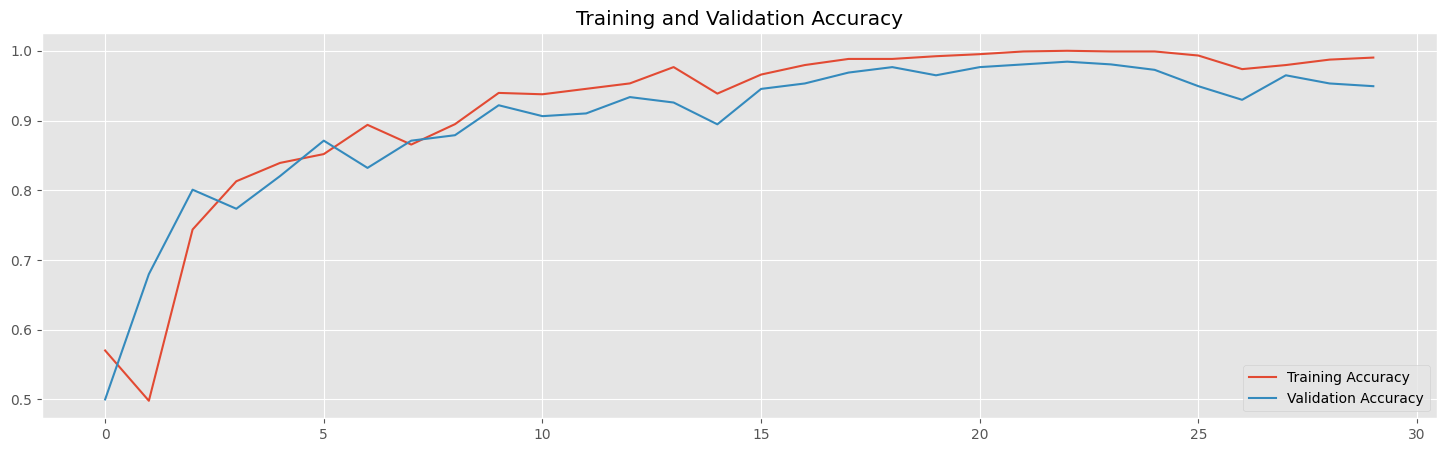

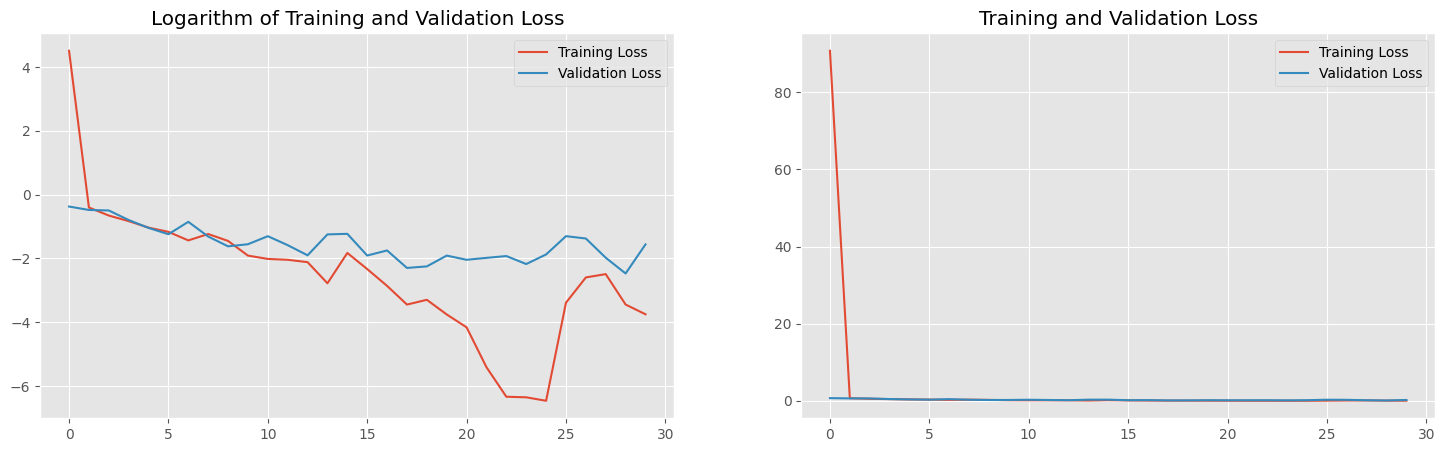

In [7]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()


In [8]:
model.save("models_saved/alexnet_best0")

INFO:tensorflow:Assets written to: models_saved/alexnet_best0/assets


INFO:tensorflow:Assets written to: models_saved/alexnet_best0/assets
